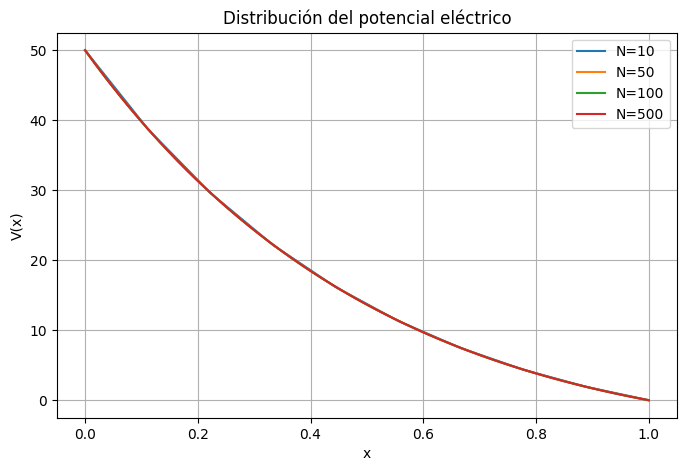

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def resolver_diferencias_finitas(N):
    L = 1  # Longitud de la barra
    V0 = 10  # Valor dado en la ecuación
    dx = L / (N - 1)  # Tamaño del paso
    x = np.linspace(0, L, N)  # Discretización del dominio
    
    # Inicialización de la matriz y vector del sistema
    A = np.zeros((N, N))
    b = np.zeros(N)
    
    # Condiciones de frontera
    A[0, 0] = 1
    b[0] = 50  # V(0) = 50
    A[-1, -1] = 1
    b[-1] = 0  # V(1) = 0
    
    # Construcción de la matriz del sistema
    for i in range(1, N - 1):
        A[i, i - 1] = 1 / dx**2 - 2 / (2 * dx)  # Coeficiente de V_{i-1}
        A[i, i] = -2 / dx**2 + 0.5  # Coeficiente de V_i
        A[i, i + 1] = 1 / dx**2 + 2 / (2 * dx)  # Coeficiente de V_{i+1}
        b[i] = 0.5 * V0  # Término independiente
    
    # Resolviendo el sistema de ecuaciones
    V = np.linalg.solve(A, b)
    
    return x, V

# Definir los valores de N a evaluar
N_values = [10, 50, 100, 500]
plt.figure(figsize=(8, 5))

# Resolver y graficar para cada N
for N in N_values:
    x, V = resolver_diferencias_finitas(N)
    plt.plot(x, V, label=f'N={N}')

# Configuración de la gráfica
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title('Distribución del potencial eléctrico')
plt.legend()
plt.grid()
plt.show()

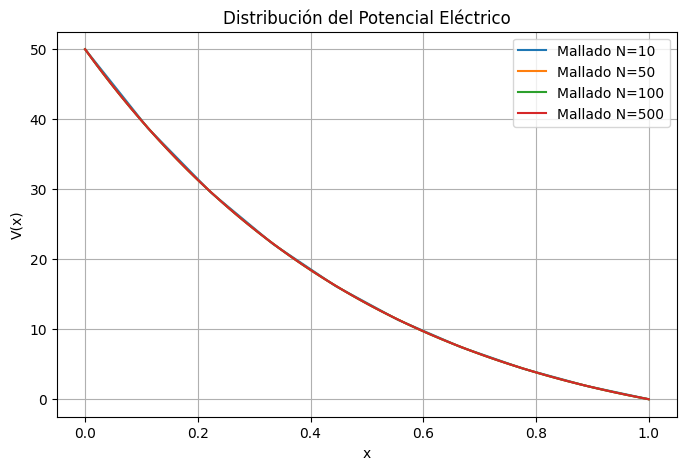

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de parámetros y condiciones de frontera
x_inicio, x_final = 0, 1  # Longitud de la barra
V_inicio, V_final = 50, 0  # Condiciones de frontera
V0 = 10  # Valor dado en la ecuación

# Lista de mallados a evaluar
N_values = [10, 50, 100, 500]

# Crear la figura para graficar
plt.figure(figsize=(8, 5))

# Iterar sobre cada valor de N
for N in N_values:
    dx = (x_final - x_inicio) / (N - 1)  # Tamaño del paso
    x_discreto = np.linspace(x_inicio, x_final, N)
    
    # Inicialización de la matriz y el vector b
    A = np.zeros((N, N))
    b = np.zeros(N)
    
    # Condiciones de frontera
    A[0, 0] = 1
    b[0] = V_inicio
    
    A[-1, -1] = 1
    b[-1] = V_final
    
    # Construcción de la matriz del sistema con diferencias finitas
    for i in range(1, N - 1):
        A[i, i - 1] = 1 / dx**2 - 2 / (2 * dx)
        A[i, i] = -2 / dx**2 + 0.5
        A[i, i + 1] = 1 / dx**2 + 2 / (2 * dx)
        b[i] = 0.5 * V0
    
    # Resolver el sistema
    V_numerico = np.linalg.solve(A, b)
    
    # Graficar resultados
    plt.plot(x_discreto, V_numerico, label=f'Mallado N={N}')

# Configuración del gráfico
plt.xlabel("x")
plt.ylabel("V(x)")
plt.title("Distribución del Potencial Eléctrico")
plt.legend()
plt.grid()
plt.show()